<a href="https://colab.research.google.com/github/Archanatshinod/Machine_Learning/blob/main/Supervised%20ML/diabeties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATASET/diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
outcome_enc=lbl.fit_transform(df['smoking_history'])

In [ ]:
df['smoking_history']=outcome_enc

In [ ]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
outcome=lbl.fit_transform(df['gender'])

In [ ]:
df['gender']=outcome
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
data_scaled= sc.fit_transform(df)
data_scaled= pd.DataFrame(data_scaled)
data_scaled

,0,1,2,3,4,5,6,7,8
0,0.0,1.000000,0.0,1.0,0.8,0.177171,0.563636,0.272727,0.0
1,0.0,0.674675,0.0,0.0,0.0,0.202031,0.563636,0.000000,0.0
2,0.5,0.349349,0.0,0.0,0.8,0.202031,0.400000,0.354545,0.0
3,0.0,0.449449,0.0,0.0,0.2,0.156863,0.272727,0.340909,0.0
4,0.5,0.949950,1.0,1.0,0.2,0.118231,0.236364,0.340909,0.0
...,...,...,...,...,...,...,...,...,...
99995,0.0,1.000000,0.0,0.0,0.0,0.202031,0.490909,0.045455,0.0
99996,0.0,0.024024,0.0,0.0,0.0,0.085901,0.545455,0.090909,0.0
99997,0.5,0.824825,0.0,0.0,0.6,0.207983,0.400000,0.340909,0.0
99998,0.0,0.299299,0.0,0.0,0.8,0.296569,0.090909,0.090909,0.0


In [ ]:
x = data_scaled.iloc[:,:-1]
y = data_scaled.iloc[:,-1].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier()
model1.fit(x_train,y_train)
y_pred1= model1.predict(x_test)
acc1 = accuracy_score(y_test,y_pred1)
print("Accuracy of KNN Algorithm:", acc1)

Accuracy of KNN Algorithm: 0.96048


In [ ]:
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()
model2.fit(x_train,y_train)
y_pred2= model2.predict(x_test)
acc2 = accuracy_score(y_test,y_pred2)
print("Accuracy of Naive bayes Algorithm:", acc2)

Accuracy of Naive bayes Algorithm: 0.90516


In [ ]:
from sklearn.svm import SVC
model3 = SVC()
model3.fit(x_train,y_train)
y_pred3= model3.predict(x_test)
acc3 = accuracy_score(y_test,y_pred3)
print("Accuracy of SVM:", acc3)

Accuracy of SVM: 0.96064


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier()
model4.fit(x_train,y_train)
y_pred4= model4.predict(x_test)
acc4 = accuracy_score(y_test,y_pred4)
print("Accuracy of decision Algorithm:", acc4)

Accuracy of decision tree Algorithm: 0.95168


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model5 =RandomForestClassifier()
model5.fit(x_train,y_train)
y_pred5= model5.predict(x_test)
acc5 = accuracy_score(y_test,y_pred5)
print("Accuracy of Random Forest Algorithm:", acc5)

Accuracy of Random Forest Algorithm: 0.96976


In [ ]:
from sklearn.linear_model import LogisticRegression
model6 = LogisticRegression()
model6.fit(x_train,y_train)
y_pred6= model6.predict(x_test)
acc6 = accuracy_score(y_test,y_pred6)
print("Accuracy of Logistic regression Algorithm:", acc1)

Accuracy of Logistic regression Algorithm: 0.96048


In [ ]:
accuracy_df=pd.DataFrame({'Accuracy':[acc1,acc2,acc3,acc4,acc5,acc6],'Algorithm':['KNN','Naive Bayes','SVM','Decision Tree','Random Forest','Logistic Regression']})
accuracy_df

,Accuracy,Algorithm
0,0.96048,KNN
1,0.90516,Naive Bayes
2,0.96064,SVM
3,0.95168,Decision Tree
4,0.96976,Random Forest
5,0.95844,Logistic Regression


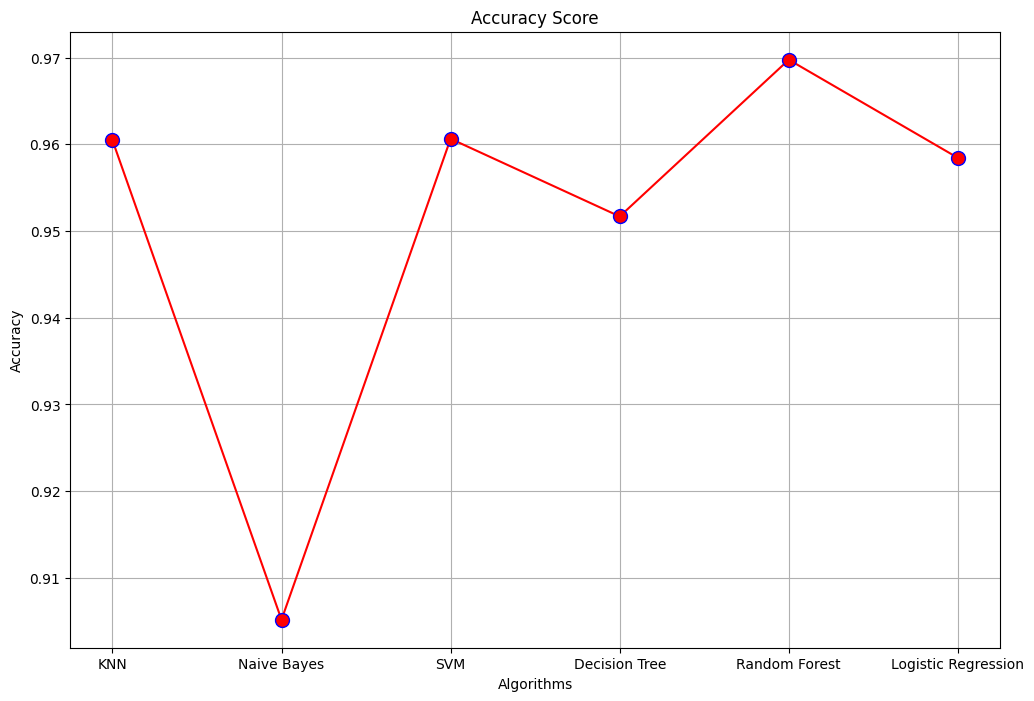

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot('Algorithm','Accuracy',data=accuracy_df,marker='o',color='red',ms = 10,mfc = 'r',mec = 'blue')
plt.title("Accuracy Score")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.plot()
plt.grid()

**SAVE THE BEST MODEL**

In [ ]:
import joblib

# Save the model to a file
joblib.dump(model5, '/content/drive/MyDrive/Colab Notebooks/DATASET/DibetiesPredLRFModel.pkl')


['/content/drive/MyDrive/Colab Notebooks/DATASET/DibetiesPredLRFModel.pkl']

**MODEL LOAD**

In [ ]:
import joblib

# Load the model from the file
model6 = joblib.load('/content/drive/MyDrive/Colab Notebooks/DATASET/DibetiesPredLRFModel.pkl')


In [ ]:
gender = int(input("Enter gender: "))
age = float(input("Enter age: "))
hypertension = int(input("Enter hypertension: "))
heart_disease = int(input("Enter heart_disease: "))
smoking_history = int(input("Enter smoking history: "))
bmi= float(input("Enter bmi: "))
HbAlc_level = float(input("Enter HbAlc level: "))
blood_glucose_level = int(input("Enter blood_glucose_level: ")) #0	80.0	0	1	4	25.19	6.6	140

Enter gender: 0
Enter age: 80
Enter hypertension: 0
Enter heart_disease: 1
Enter smoking history: 4
Enter bmi: 25.19
Enter HbAlc level: 6.6
Enter blood_glucose_level: 140


In [ ]:
model_selection=model6.predict([[gender, age, hypertension, heart_disease,
                                smoking_history, bmi, HbAlc_level, blood_glucose_level]])
model_selection

array([1.])

In [ ]:
if model_selection==1:
  print("Presence of diabeties")
else:
  print("Absence of diabeties")

Presence of diabeties
